In [11]:
import pandas as pd
import numpy as np
import matplotlib
from tensorflow import keras
import os
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 

# read data set
base_src = './drive/MyDrive/machine_learning/datasets/codebasics'
friend_src = base_src + '/homeprices_banglore.csv'


In [12]:
df = pd.read_csv(friend_src)
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
15,1175,2,42.0
6,2732,4,135.0
1,2600,4,120.0
10,1800,3,82.0


In [13]:
# scale
from sklearn import preprocessing 
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [56]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [54]:
print(len(scaled_y))

20


In [22]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01) :
  number_of_features = X.shape[1] # num of features(colums)
  # w1,w2,bias
  w = np.ones(shape=(number_of_features)) # w1,w2를 반환
  b = 0 # 0으로 초기화 
  total_samples = X.shape[0]

  cost_list  = []
  epoch_list = []

  for i in range(epochs) :
    # calculated y_predicted
    # y_predicted = w[0]*X['area'] + w[1]*X['bedrooms'] + b
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples) * (X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i % 10 == 0 :
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list


In [23]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

In [24]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

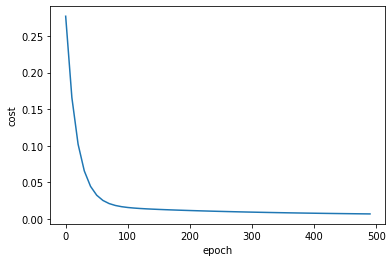

In [26]:
# see how cost reduce
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [28]:
# stochastic gradient descent
def predict(area,bedrooms,w,b) :
  # 2차원 배열 return --> 그 중 1st dimension을 return 받고 싶다 
  scaled_X     = sx.transform([[area,bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  # reverse Transform ( 0 ~ 1 에서 actual price를 얻어내야 한다)
  return sy.inverse_transform([[scaled_price]])[0][0]

128.45484403267596

In [29]:
predict(2600,4,w,b)

128.45484403267596

In [30]:
predict(1000,2,w,b)

30.253094462442355

In [31]:
import random
random.randint(0,6) # 0 ~ 6 사이 random 숫자 반환

6

In [40]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list  = []
  epoch_list = []

  for i in range(epochs) : 
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w,sample_x.T) * b

    w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples) * (sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(sample_y - y_predicted))

    if i % 100 == 0 :
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list


In [41]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([1.4510655 , 1.37482961]), 0.30636108732128037, 0.018149185301127965)

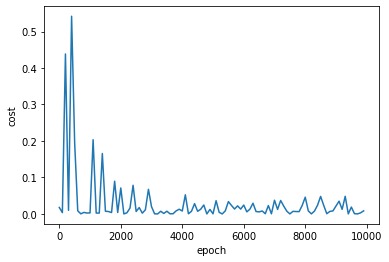

In [42]:
# see how cost reduce
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [43]:
predict(2600,4,w_sgd,b_sgd)

334.1495263250337

In [44]:
predict(150,3,w_sgd,b_sgd)

122.25250517583596

In [68]:
# we should convert target column into one dimensional array
# it has become 2d due to scaling we did above
# not we should change to 1d
# 20인 이유는, 20 행이 존재하기 때문이다
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [53]:
np.random.permutation(20) 

array([19, 12,  1,  3,  4,  6,  8,  5,  2, 13, 17, 18,  0,  7, 14, 15,  9,
       11, 10, 16])

In [72]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [75]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71011549, 0.67816321]), -0.23331262038933584, 0.014511238821330524)

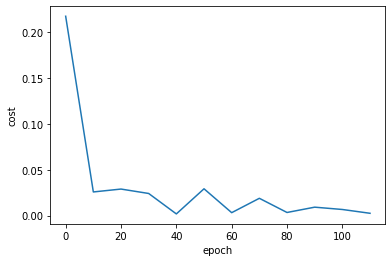

In [76]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [77]:
predict(1000,2,w,b)

30.002224629067477